In [160]:
import pandas as pd
import numpy as np

import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# To ignore warning
import warnings
warnings.filterwarnings('ignore')

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [161]:
df =pd.read_csv("../Data/lingSpam.csv")
df.drop('Unnamed: 0',1,inplace = True)
df.dropna(inplace = True)

In [162]:
# # To Check language detection 
# import langdetect
# from langdetect import detect_langs
# print(detect_langs(text))

- Check for null values
- check for duplicate values

# Text Preprocessing Steps
Some of the preprocessing steps are:
- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Stemming
- Lemmatization

## Lower Case
If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine. for example, words like Ball and ball are treated differently by machine.

In [163]:
for i in range(df.shape[0]):
    df['Body'][i] = df['Body'][i].lower()

## Expanding Contractions:
- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe, and removing them contributes to text standardization

In [164]:
contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
 "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", 
 "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
 "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
 "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", 
 "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", 
 "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", 
 "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", 
 "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
 "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", 
 "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", 
 "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will",
 "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
 "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
 "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", 
 "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", 
 "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", 
 "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", 
 "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
 "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [165]:
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

for i in range(df.shape[0]):
  df['Body'][i] = expand_contractions(df['Body'][i])

## Removing number and punctuation
- Regular Expression in Python for details: 

    https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/

In [166]:
for i in range(df.shape[0]):
    df['Body'][i] = re.sub("http://\S+|https://\S+,http[s]?://\S+,http\S+", "urladd", df['Body'][i]) # For b URL
    df['Body'][i] = re.sub("b[w-]+?@w+?.w{2,4}b", "emailid", df['Body'][i]) # For Email ID
    df['Body'][i] = re.sub("[^a-zA-Z]", " ",df['Body'][i]) # For removing number and punctuations

## Word Tokenization
- Tokenization is the process of breaking text into smaller pieces called tokens. These smaller pieces can be sentences, words, or sub-words.

In [167]:
for i in range(df.shape[0]):
    df['Body'][i] = word_tokenize(df['Body'][i])

## Stop Word Removing
-  Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.
- Before removing stop words, research a bit about your task and the problem you are trying to solve, and then make your decision.

In [168]:
#loading the english language stop words from nltk
sw_nltk = stopwords.words('english')

#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

In [169]:
# Removing Stop words and words whose length is less than 3
for i in range(df.shape[0]):
    df['Body'][i] = [w for w in df['Body'][i] if not w in sw_spacy]
    df['Body'][i] = [w for w in df['Body'][i] if not len(w)<3]

## Stemming and Lemmatization:
- It is a process of transforming a word to its root form. 
- Unlike stemming, lemmatization reduces the words to a word existing in the language.

In [173]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

for i  in range(df.shape[0]):
  df['Body'][i] = [lemmatizer.lemmatize(word) for word in df['Body'][i]]

## Preprocessing Function

In [212]:
contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
 "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", 
 "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
 "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
 "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", 
 "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", 
 "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", 
 "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", 
 "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
 "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", 
 "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", 
 "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will",
 "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
 "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
 "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", 
 "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", 
 "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", 
 "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", 
 "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
 "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def preprocessing(data,text_col,target_col):
    dataframe = pd.DataFrame(columns=[text_col,target_col])
    data_size = data.shape[0]

    lemmatizer = WordNetLemmatizer()
    en = spacy.load('en_core_web_sm')
    sw_spacy = en.Defaults.stop_words
    
    contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
    def expand_contractions(s, contractions_dict=contractions_dict):
        def replace(match):
            return contractions_dict[match.group(0)]
        return contractions_re.sub(replace, s)
    
    for i in range(data_size):
        sent = data[text_col][i].lower()
        sent = expand_contractions(sent)
        sent = re.sub("http://\S+|https://\S+,http[s]?://\S+,http\S+"," ",sent)
        sent = re.sub("b[w-]+?@w+?.w{2,4}b", " ",sent)
        sent = re.sub("[^a-zA-Z]"," ",sent)
        sent = word_tokenize(sent)
        sent = [w for w in sent if not w in sw_spacy and len(w)>3]
        dataframe.loc[i] = [[lemmatizer.lemmatize(word) for word in sent],data[target_col][i]]
        
    return dataframe

df_pre = preprocessing(df,'Body','Label')

## TF-IDF and CountVectorizer
TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(max_features=4000)
vectorizer = CountVectorizer(max_features=4000)

x = tfidf.fit_transform([' '.join(text) for text in df['Body']]).toarray()
y = df['Label'].values

X_train = vectorizer.fit_transform([' '.join(text) for text in df['Body']]).toarray()
y_train = df['Label']

## Word2Vec
- Word2Vec is a neural network model, that provides a numerical vector representation for a given word.
- Word2Vec can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW)
- This numerical vector is often called as "Word Embedding".
- Despite other methods of Bag of Words and TF-IDF, Word2Vec takes the context of the word into consideration while converting a word to a numerical vector

### CBOW Model: 
- This method takes the context of each word as the input and tries to predict the word corresponding to the context.

In [280]:
from gensim.models import Word2Vec

# Training Model with custom data
model = Word2Vec(sentences=df.Body, vector_size=200,workers=-1, window=10, min_count=2,sg =0)

Below I provide the definition of four parameters that we used to define a Word2Vec model:

- size: The size means the dimensionality of word vectors. It defines the number of tokens used to represent each word. For example, rake a look at the picture above. The size would be equal to 4 in this example. Each input word would be represented by 4 tokens: King, Queen, Women, Princess. Rule-of-thumb: If a dataset is small, then size should be small too. If a dataset is large, then size should be greater too. It's the question of tuning.

- window: The maximum distance between the target word and its neighboring word. For example, let's take the phrase "agama is a reptile " with 4 words (suppose that we do not exclude the stop words). If window size is 2, then the vector of word "agama" is directly affected by the word "is" and "a". Rule-of-thumb: a smaller window should provide terms that are more related (of course, the exclusion of stop words should be considered).

- min_count: Ignores all words with total frequency lower than this. For example, if the word frequency is extremally low, then this word might be considered as unimportant.

- sg: Selects training algorithm: 1 for Skip-Gram; 0 for CBOW (Continuous Bag of Words).

- workers: The number of worker threads used to train the model.

In [224]:
# Printing all similar words in the vocabulary for a given random word present in our vocabulary
model.wv.most_similar('subject', topn=10)

# Word Embedding for a given word
model.wv.get_vector('job')
    
# Total number of words in the Vocabulary on which the Word2Vec model is trained
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

[('zytkow', 0.3069491982460022),
 ('unwanted', 0.28051483631134033),
 ('skeletal', 0.2662142515182495),
 ('percent', 0.260498046875),
 ('carly', 0.2543739676475525),
 ('carrasco', 0.2503739297389984),
 ('bowden', 0.24723777174949646),
 ('time', 0.24360238015651703),
 ('hku', 0.24261543154716492),
 ('hopital', 0.24091456830501556)]

## Average Word2Vec
Average Word2Vec is a technique in which the average of word embeddings of all the words given in a sentence is used as the numerical vector for a given sentence

In [267]:
## Before Splitting Data into test and train
def avg_w2vec(dataframe):
    model1 = Word2Vec(sentences=dataframe.Body, vector_size=200,workers=-1)
    vocab=list(model1.wv.key_to_index.keys())
    transformed=[]
    for i in range(dataframe.shape[0]):
        count=0
        vector=np.zeros(200)
        for word in dataframe['Body'][i]:
            if word in vocab:
                a = model1.wv.get_vector(word)
                vector+=a
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(dataframe['Body'][i])
    return np.array(transformed)

## After Splitting Data into test and train
def avg_w2vec(sentences):
    to_drop = []
    transformed=[]
    for i in range(sentences.shape[0]):
        count=0
        vector=np.zeros(200)
        for word in sentences[i]:
            if word in vocab:
                a = model.wv.get_vector(word)
                vector+=a
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            to_drop.append(i)
    print(to_drop)
    return np.array(transformed)

df_transformed=avg_w2vec(df)

In [269]:
# After splitting data into train and test need to do transformation
df_transformed=avg_w2vec(df)

## Model Building

In [266]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
X_train.shape

(2084, 44782)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_transformed,y_train)

In [208]:
from sklearn.naive_bayes import GaussianNB

In [209]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_model.score(X_test,y_test)

0.8656429942418427

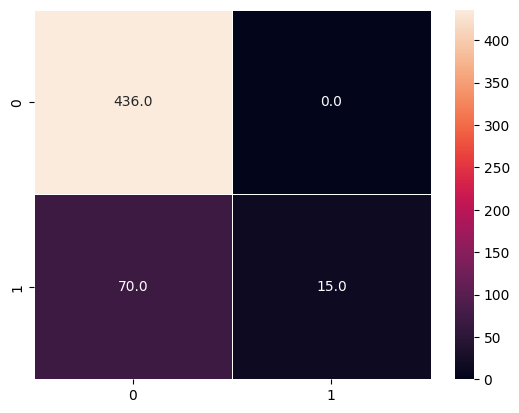

In [210]:
from sklearn.metrics import confusion_matrix
y_pred = nb_model.predict(X_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)

import seaborn

seaborn.heatmap(conf,annot=True,fmt=".1f",linewidths=0.5)

import matplotlib.pyplot as plt
plt.show()